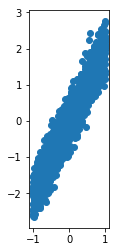

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=np.linspace(-1,1,2000)
y=2*x+ np.random.randn(*x.shape) * 0.33
plt.scatter(x,y)
plt.show()

In [26]:
def line(x,w=0,b=0):
    return (x*w)+b
pline=line(x,2)
pline


array([-2.      , -1.997999, -1.995998, ...,  1.995998,  1.997999,
        2.      ])

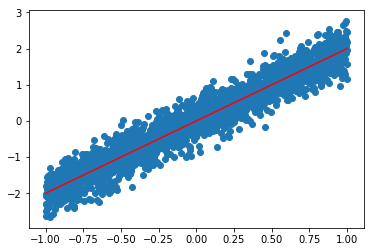

In [27]:
plt.scatter(x,y)
plt.plot(x,pline,c='r')
plt.show()

In [28]:
def rmse(pridictions,targets):
    return np.sqrt(((pridictions-targets) ** 2).mean())
        


In [29]:
rmse(pline,y)

0.331375875560958

In [30]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [42]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(1,activation='softmax',input_dim=1))
model.compile(optimizer='rmsprop',loss='mae',metrics=['mse','mae','accuracy'])
history=model.fit(x,y,epochs=100)

Epoch 1/100
2000/2000 [==============================] - 2s 850us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 2/100
2000/2000 [==============================] - 0s 85us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 3/100
2000/2000 [==============================] - 0s 76us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 4/100
2000/2000 [==============================] - 0s 87us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 5/100
2000/2000 [==============================] - 0s 80us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 6/100
2000/2000 [==============================] - 0s 73us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 7/100
2000/2000 [====

2000/2000 [==============================] - 0s 77us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 52/100
2000/2000 [==============================] - 0s 76us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 53/100
2000/2000 [==============================] - 0s 71us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 54/100
2000/2000 [==============================] - 0s 74us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 55/100
2000/2000 [==============================] - 0s 72us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00
Epoch 56/100
2000/2000 [==============================] - 0s 76us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00 0s - loss: 1.2323 - mean_squared_er

2000/2000 [==============================] - 0s 82us/step - loss: 1.2786 - mean_squared_error: 2.4613 - mean_absolute_error: 1.2786 - acc: 0.0000e+00


In [33]:
model.evaluate(x,y)

2000/2000 [==============================] - 0s 63us/step


[1.2786231627464295, 2.461318208694458, 1.2786231627464295, 0.0]

In [34]:
from keras import models
from keras import layers
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28 * 28,))) # 512 is number of output nodes   
network.add(layers.Dense(10,activation='softmax'))

In [35]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images.size

47040000

In [37]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.2531 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.1047 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0687 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.0504 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0383 - acc: 0.9886


In [39]:
test_loss,test_acc=network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 182us/step


In [40]:
print("Accuracy:",test_acc,"Cost:",test_loss)

Accuracy: 0.979 Cost: 0.0742955081420485


In [43]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

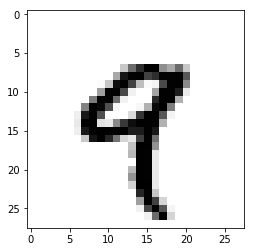

In [44]:
digits=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digits,cmap=plt.cm.binary)
plt.show()